In [ ]:
# Implementierung eines Perzeptrons, ohne der Methode zum Erlernen neuer
# logischer Verknüpfungen.
class Perceptron:
  def __init__(self, weights, bias):
    """ Konstruiert ein neues Perzeptron.

    Args:
      weights: Die initialen Gewichte des Perzeptrons.
      bias: Der initiale Bias des Perzeptrons.
    """
    self.weights = weights
    self.bias = bias

  def heaviside_step_fn(x):
    """ Setzt die mathematische Heaviside-Schrittfunktion um.

    Args:
      x: der Parameter der Funktion.

    Returns:
      0 wenn x<0 sonst 1
    """
    return 1 if x >= 0 else 0

  def predict(self, input):
    """ Errechnet den Ausgang des Perzeptrons, basierend auf den Eingangswerten,
        Gewichten und dem Bias.

    Args:
      input: Die Eingangswerte des Perzeptrons.

    Returns:
      Der Ausgabewert (0 oder 1) des Perzeptrons.
    """
    sum = self.linear(input)
    return Perceptron.heaviside_step_fn(sum)

  def linear(self, input):
    """Errechnet den gewichteten Durchschnitt der Eingangswerte plus den Bias.

    Args:
      input: Die Eingangswerte des Perzeptrons.

    Returns:
      Der gewichtete Durchschnitt aller Werte plus der Bias.
    """
    sum = self.bias
    for i in range(len(input)):
      sum += input[i] * self.weights[i]
    return sum

  def __str__(self):
    return f"Gewichte: {self.weights}, Bias: {self.bias}"

In [ ]:
# Definieren eines Perzeptrons für die Und-Verknüpfung.
perceptron = Perceptron([0.5, 0.5], -0.4)

# Auswerten der Vorhersage mit allen Kombinationen von x1, x2.
for x1 in range(2):
  for x2 in range(2):
    print(x1, x2, perceptron.predict([x1, x2]))

print(perceptron)

0 0 0
0 1 1
1 0 1
1 1 1
Gewichte: [0.5, 0.5], Bias: -0.4


In [ ]:
class Perceptron:
  def __init__(self, weights, bias):
    """ Konstruiert ein neues Perzeptron.

    Args:
      weights: Die initialen Gewichte des Perzeptrons.
      bias: Der initiale Bias des Perzeptrons.
    """
    self.weights = weights
    self.bias = bias

  def heaviside_step_fn(x):
    """Setzt die mathematische Heaviside-Schrittfunktion um.

    Args:
      x: Der Parameter der Funktion.

    Returns:
      0 wenn x<z sonst 1
    """
    return 1 if x >= 0 else 0

  def predict(self, input):
    """ Errechnet den Ausgang des Perzeptrons, basierend auf den Eingangswerten,
        Gewichten und dem Bias.

    Args:
      input: Die Eingangswerte des Perzeptrons.

    Returns:
      Der Ausgabewert (0 oder 1) des Perzeptrons.
    """
    sum = self.linear(input)
    return Perceptron.heaviside_step_fn(sum)

  def linear(self, input):
    """ Errechnet den gewichteten Durchschnitt der Eingangswerte plus den Bias.

    Args:
      input: Die Eingangswerte des Perzeptrons.

    Returns:
      Der gewichtete Durchschnitt aller Werte plus der Bias.
    """
    sum = self.bias
    for i in range(len(input)):
      sum += input[i] * self.weights[i]
    return sum

  def train(self, x, y_true, learning_rate = 0.005):
    """ Trainiert das Perzeptron mit den gegebenen Daten.

    Args:
      x: Die Eingabewerte des Perzeptrons.
      y_true: Der gewünschte Ausgabewert des Perzeptrons.
      learning_rate: Die Lernrate des Perzeptrons.

    Returns:
      Den absoluten Fehler des Perzeptrons.
    """
    # Die Vorhersage vor der Bias-/Gewichtsanpassung.
    y_hat = self.predict(x)
    # Der Fehler durch die Vorhersage.
    error = y_true - y_hat

    # Anpassen der Gewichte und des Bias basierend auf dem Fehler,
    # Lernrate und Eingabewert
    self.weights += learning_rate * error * x
    self.bias += learning_rate * error
    return abs(error)

  def __str__(self):
    return f"Gewichte: {self.weights}, Bias: {self.bias}"

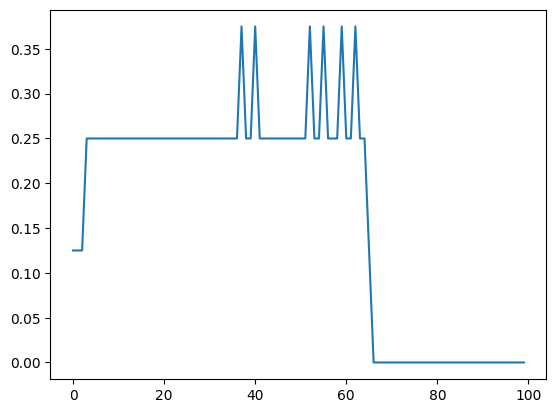

Gewichte: [-0.06930485 -0.04663815 -0.03520244], Bias: 0.1339353916650588
[0 0 0] 1 1
[0 0 1] 1 1
[0 1 0] 1 1
[0 1 1] 1 1
[1 0 0] 1 1
[1 0 1] 1 1
[1 1 0] 1 1
[1 1 1] 0 0
Acc 100.0 %


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import random

# Definieren der Trainingsdaten
X = np.array([[0,0,0], [0,0,1], [0,1,0], [0,1,1], [1,0,0], [1,0,1],
              [1,1,0], [1,1,1]])
Y = np.array([1,1,1,1,1,1,1,0])

# Definieren der Hyperparameter.
EPOCHS = 100
LEARNING_RATE = 0.02

# Trainieren des Perzeptrons.
perceptron = Perceptron(np.array([random.random() for i in range(X.shape[1])]), random.random())
avg_loss = []
for epoche in range(EPOCHS):
  loss = 0
  for x,y in zip(X, Y):
    loss += perceptron.train(x, y, LEARNING_RATE)
  avg_loss.append(loss / len(X))

plt.plot(avg_loss)
plt.show()

print(perceptron)

# Evaluieren des trainierten Perzeptrons.
acc = 0
for i in range(len(X)):
  y_hat = perceptron.predict(X[i])
  if y_hat == Y[i]:
    acc += 1
  print(X[i], Y[i], y_hat)

print("Acc", acc / len(X)*100, "%")

Lösung mit einem realistischen Datensatz:
# Neuer Abschnitt
| Tageszeit     | Aktivität      | Freundin dabei | Wetter  | KI-Lernen |
|---------------|----------------|----------------|---------|-----------|
| Morgens       | Arbeiten       | Nein           | Sonnig  | Nein      |
| Morgens       | Arbeiten       | Ja             | Regen   | Ja        |
| Mittags       | Sport          | Ja             | Sonnig  | Nein      |
| Mittags       | Sport          | Nein           | Regen   | Nein      |
| Abends        | Programmieren  | Ja             | Sonnig  | Ja        |
| Abends        | Programmieren  | Nein           | Regen   | Ja        |
| Nachmittags   | Lesen          | Ja             | Sonnig  | Ja        |
| Nachmittags   | Lesen          | Nein           | Regen   | Ja        |
| Morgens       | Lesen          | Nein           | Sonnig  | Nein      |
| Mittags       | Arbeiten       | Ja             | Regen   | Nein      |
| Abends        | Sport          | Ja             | Sonnig  | Nein      |
| Nachmittags   | Arbeiten       | Nein           | Regen   | Ja        |
| Morgens       | Arbeiten       | Nein           | Regen   | Ja        |


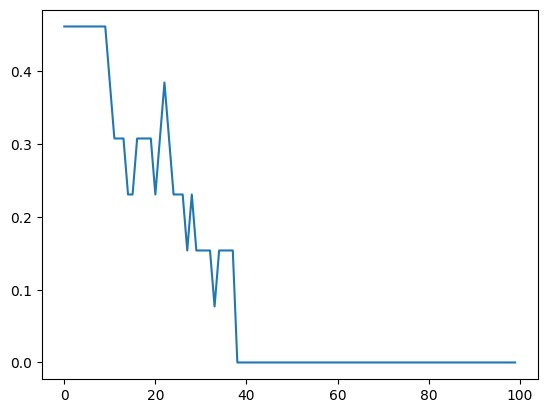

Gewichte: [ 0.0014219  -0.1865728   0.25044972  0.52314505  0.24050377 -0.23370571
  0.23776486  0.13097876 -0.07486183 -0.11588975], Bias: -0.14088154675582837
[1 0 0 0 1 0 0 0 0 1] 0 0
[1 0 0 0 1 0 0 0 1 0] 1 1
[0 1 0 0 0 1 0 0 1 1] 0 0
[0 1 0 0 0 1 0 0 0 0] 0 0
[0 0 0 1 0 0 1 0 1 1] 1 1
[0 0 0 1 0 0 1 0 0 0] 1 1
[0 0 1 0 0 0 0 1 1 1] 1 1
[0 0 1 0 0 0 0 1 0 0] 1 1
[1 0 0 0 0 0 0 1 0 1] 0 0
[0 1 0 0 1 0 0 0 1 0] 0 0
[0 0 0 1 0 1 0 0 1 1] 0 0
[0 0 1 0 1 0 0 0 0 0] 1 1
[1 0 0 0 1 0 0 0 0 0] 1 1
Acc 100.0 %
Tageszeit: Morgens
Aktivität: Arbeiten
Freundin dabei: Nein
Wetter: Wolkig
Heute wird sicher KI gelernt.


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import random

# Binäre Codierung des Datensatzes
# [Morgen, Mittags, Abends, Arbeiten, Sport,
# Programmieren, Lesen, Freundin, Wetter, Ki-Lernen]
str_data = '''1,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,1
0,1,0,0,0,1,0,0,1,1,0
0,1,0,0,0,1,0,0,0,0,0
0,0,0,1,0,0,1,0,1,1,1
0,0,0,1,0,0,1,0,0,0,1
0,0,1,0,0,0,0,1,1,1,1
0,0,1,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,1,0,1,0
0,1,0,0,1,0,0,0,1,0,0
0,0,0,1,0,1,0,0,1,1,0
0,0,1,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,1'''

data = [[int(i) for i in l.split(',')] for l in str_data.split('\n')]

# Definieren der Trainingsdaten
X = np.array([i[:10] for i in data])
Y = np.array([i[10] for i in data])

# Definieren der Hyperparameter
EPOCHS = 100
LEARNING_RATE = 0.01

# Trainieren des Perzeptrons.
perceptron = Perceptron(np.array([random.random() for i in range(X.shape[1])]), random.random())
avg_loss = []
for epoche in range(EPOCHS):
  loss = 0
  for i in range(len(X)):
    loss += perceptron.train(X[i], Y[i], LEARNING_RATE)
  avg_loss.append(loss / len(X))

plt.plot(avg_loss)
plt.show()

print(perceptron)

# Evaluieren des trainierten Perzeptrons.
acc = 0
for i in range(len(X)):
  y_hat = perceptron.predict(X[i])
  if y_hat == Y[i]:
    acc += 1
  print(X[i], Y[i], y_hat)

print("Acc", acc / len(X)*100, "%")

# Benutzereingabe für Vorhersage
day_time = input("Tageszeit: ")
activity = input("Aktivität: ")
friend = input("Freundin dabei: ")
weather = input("Wetter: ")

# Binäre Codierung der Benutzereingaben
day_time = [day_time == "Morgens", day_time == "Mittags",
            day_time == "Nachmittags", day_time == "Abends"]
activity = [activity == "Arbeiten", activity == "Sport",
            activity == "Programmieren", activity == "Lesen"]
friend = [friend == "Ja"]
weather = [weather == "Sonnig"]

feature_vector = np.array([int(i) for i in (day_time + activity + friend + weather)])
print("Heute wird", "nicht" if perceptron.predict(feature_vector)==0 else "sicher", "KI gelernt.")